In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
fruits =pd.read_table('fruit_data.txt')

In [5]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
fruits.shape

(59, 7)

In [8]:
fruits.fruit_name.unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [10]:
fruits.groupby('fruit_name').size()

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

In [13]:
feature_names=['mass','width','height','color_score']

In [14]:
X=fruits[feature_names]
Y=fruits['fruit_label']

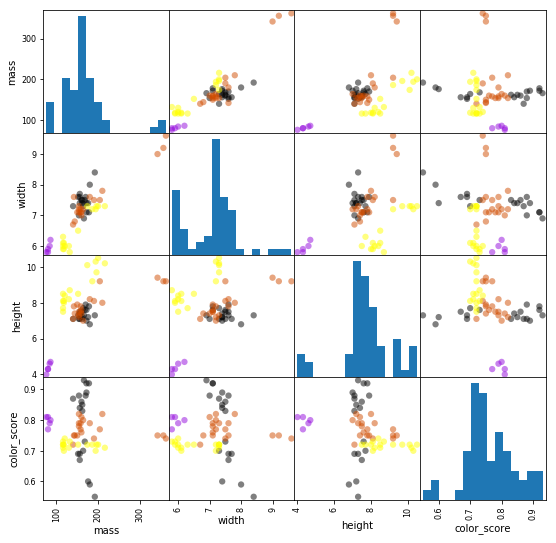

In [18]:
cmap = cm.get_cmap('gnuplot')

scatter = pd.scatter_matrix(X, c = Y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)

In [19]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [21]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.transform(Xtest)

c:\users\diall\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# We will be implementing a Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
logRegression = LogisticRegression()


In [23]:
logRegression.fit(Xtrain,Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
print('Accuracy of logistic regression on training set is') 
logRegression.score(Xtrain,Ytrain)

Accuracy of logistic regression on training set is


0.7045454545454546

In [26]:
print('Accuracy of logistic regression on test set is') 
logRegression.score(Xtest,Ytest)

Accuracy of logistic regression on test set is


0.4

# We will be implementing a decision tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
decisionTreeClassifier =DecisionTreeClassifier()


In [29]:
decisionTreeClassifier.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
print('Accuracy of the decision tree classifier on the training set')
decisionTreeClassifier.score(Xtrain,Ytrain)

Accuracy of the decision tree classifier on the training set


1.0

In [32]:
print('Accuracy of the decision tree classifier on the test set')
decisionTreeClassifier.score(Xtest,Ytest)

Accuracy of the decision tree classifier on the test set


0.8666666666666667

# We will be implementing the K-Nerest  Neigbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
KNN = KNeighborsClassifier()
KNN.fit(Xtrain,Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
print('Accuray of the K-NerestNeighors on the training set')
KNN.score(Xtrain,Ytrain)

Accuray of the K-NerestNeighors on the training set


0.9545454545454546

In [37]:
print('Accuray of the K-NerestNeighors on the test set')
KNN.score(Xtest,Ytest)

Accuray of the K-NerestNeighors on the test set


1.0

# We will be implementing a Linear Discrimant Analysis

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [40]:
lda = LinearDiscriminantAnalysis()

In [41]:
lda.fit(Xtrain,Ytrain)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [42]:
print("Accuracy of the Linear Discriminant Analysis of the training set")
lda.score(Xtrain,Ytrain)

Accuracy of the Linear Discriminant Analysis


0.8636363636363636

In [43]:
print("Accuracy of the Linear Discriminant Analysis of the test set")
lda.score(Xtest,Ytest)

Accuracy of the Linear Discriminant Analysis of the test set


0.6666666666666666

# We will be implementing the Gaussian Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB


In [45]:
gnb =GaussianNB()

In [46]:
gnb.fit(Xtrain,Ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
print('The accuracy of the Gaussin Naive Bayes of the trsining set')
gnb.score(Xtrain,Ytrain)

The accuracy of the Gaussin Naive Bayes is


0.8636363636363636

In [48]:
print('The accuracy of the Gaussin Naive Bayes of the test set')
gnb.score(Xtest,Ytest)

The accuracy of the Gaussin Naive Bayes of the test set


0.6666666666666666

# We will be implementing Support vector Machine


In [50]:
from sklearn.svm import SVC

In [51]:
svm =SVC()

In [52]:
svm.fit(Xtrain,Ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [54]:
print('The accuracy of support vector machine of the training set')
svm.score(Xtrain,Ytrain)

The accuracy of support vector machine of the training set


0.6136363636363636

In [55]:
print('The accuracy of support vector machine of the test set')
svm.score(Xtest,Ytest)

The accuracy of support vector machine of the test set


0.3333333333333333

# The K-Nerest Nieghbors was the most accurate model we tried 

In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [57]:
pred =KNN.predict(Xtest)
print(confusion_matrix(Ytest,pred))
print(classification_report(Ytest,pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [58]:
pred

array([3, 3, 4, 3, 1, 1, 3, 4, 3, 1, 2, 1, 3, 3, 3], dtype=int64)